# РТ 3

## классификация knn

изучение методов классификации, расчета расстояний между объектами и применение алгоритма k-ближайших соседей.

ТО ЧТО ВНИЗУ ОБЯЗАТЕЛЬНО ЗАПУСТИТЬ ЕСЛИ НЕ В КОЛАБЕ ОТКРЫТО, ПОТОМУ ЧТО ПИТОН ТВАРЬ И НЕ ВКЛЮЧАЕТ НУЖНЫЕ БИБЛИОТЕКИ


In [5]:
import sys
!{sys.executable} -m pip install -q scikit-learn numpy pandas matplotlib scipy seaborn


## расстояния

3. пример - Евклидово расстояние

Задача: Написать функцию в Python, которая вычисляет Евклидово расстояние между двумя массивами NumPy.


In [6]:
# 1.2.3 и 1.2.4 - Метрики расстояний
import numpy as np

def euclidean_distance(a, b):
    """Евклидово расстояние"""
    return np.sqrt(np.sum((a - b)**2))

def squared_euclidean_distance(a, b):
    """Квадрат Евклидова расстояния"""
    return np.sum((a - b)**2)

def weighted_euclidean_distance(a, b, weights):
    """Взвешенное Евклидово расстояние"""
    return np.sqrt(np.sum(weights * (a - b)**2))

def manhattan_distance(a, b):
    """Хеммингово (Манхэттенское) расстояние"""
    return np.sum(np.abs(a - b))

def chebyshev_distance(a, b):
    """Расстояние Чебышева"""
    return np.max(np.abs(a - b))

# Тестирование функций
point_a = np.array([1, 2, 3])
point_b = np.array([4, 6, 8])
weights = np.array([0.5, 0.3, 0.2])

print("---")
print("---")
print(f"Точка A: {point_a}")
print(f"Точка B: {point_b}")
print(f"Веса: {weights}")
print("---")

print(f"\n1. Евклидово расстояние: {euclidean_distance(point_a, point_b):.4f}")
print(f"2. Квадрат Евклидова расстояния: {squared_euclidean_distance(point_a, point_b):.4f}")
print(f"3. Взвешенное Евклидово расстояние: {weighted_euclidean_distance(point_a, point_b, weights):.4f}")
print(f"4. Хеммингово (Манхэттенское) расстояние: {manhattan_distance(point_a, point_b):.4f}")
print(f"5. Расстояние Чебышева: {chebyshev_distance(point_a, point_b):.4f}")

# функций scipy
from scipy.spatial.distance import euclidean, cityblock, chebyshev

print("\n" + "="*60)
print("---")
print(f"Евклидово (scipy): {euclidean(point_a, point_b):.4f}")
print(f"Манхэттенское (scipy): {cityblock(point_a, point_b):.4f}")
print(f"Чебышева (scipy): {chebyshev(point_a, point_b):.4f}")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2381066719.py, line 6)

## knn классификация

2-4. примеры - k-NN на датасете Iris

Задача: Применить алгоритм k-ближайших соседей на датасете Iris Фишера. Разделить данные на обучающую и тестовую выборки, построить модель и оценить качество классификации.


Датасет Iris:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Размер датасета: (150, 5)

Классы: ['Setosa' 'Versicolor' 'Virginica']

Распределение классов:
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Размер обучающей выборки: 120
Размер тестовой выборки: 30

Точность модели: 1.0000 (100.00%)

Отчет классификации:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00

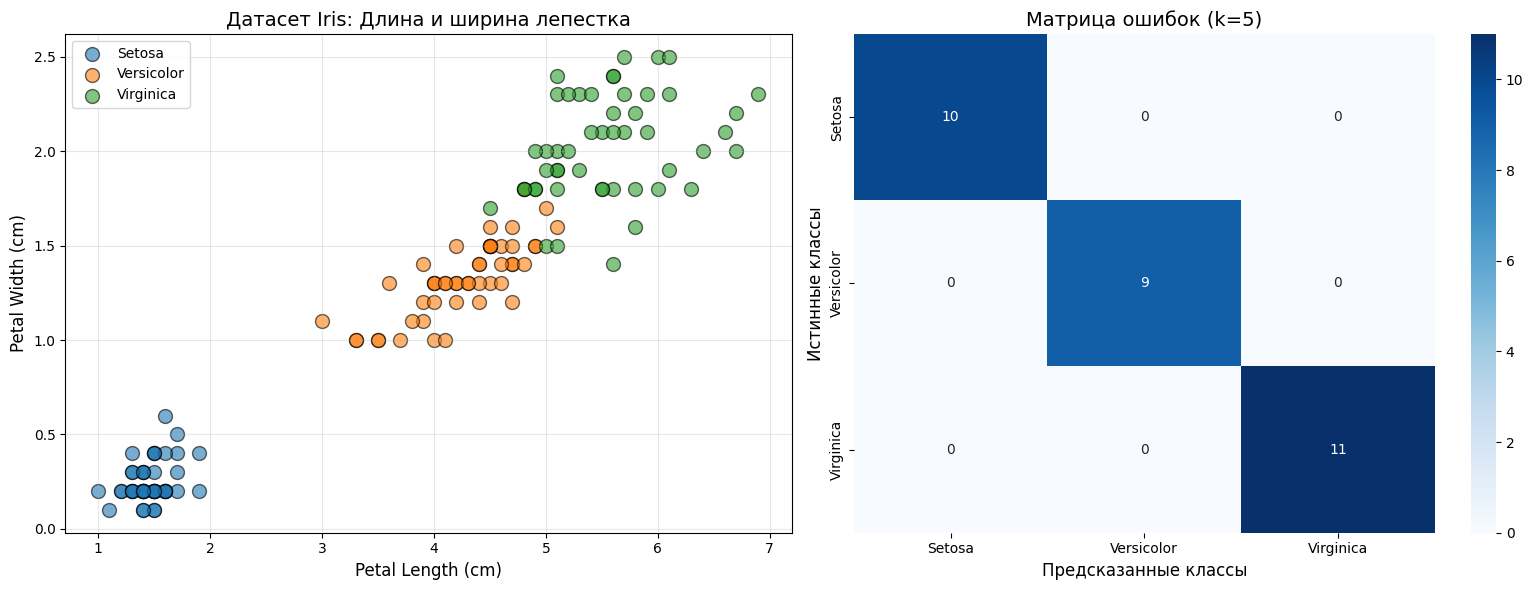


Модель k-NN с k=5 показала высокую точность классификации на датасете Iris.


In [7]:
# - k-NN классификация на Iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# загрузка данные Iris
df = pd.read_csv('data/iris.csv')

print("Датасет Iris:")
print(df.head())
print(f"\nРазмер датасета: {df.shape}")
print(f"\nКлассы: {df['variety'].unique()}")
print(f"\nРаспределение классов:\n{df['variety'].value_counts()}")

# подготовка данных
X = df[['petal.length', 'petal.width']].values  # лепестка
y = df['variety'].values

# тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# k-NN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# прогноз
y_pred = knn.predict(X_test)

# оценка качества
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"Точность модели: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nОтчет классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(f"\nМатрица ошибок:")
print(cm)

# визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Данные с разделением по классам
for variety in df['variety'].unique():
    mask = df['variety'] == variety
    axes[0].scatter(df.loc[mask, 'petal.length'], 
                   df.loc[mask, 'petal.width'],
                   label=variety, s=100, alpha=0.6, edgecolors='black')

axes[0].set_xlabel('Petal Length (cm)', fontsize=12)
axes[0].set_ylabel('Petal Width (cm)', fontsize=12)
axes[0].set_title('Датасет Iris: Длина и ширина лепестка', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: Матрица ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(df['variety'].unique()),
            yticklabels=sorted(df['variety'].unique()),
            ax=axes[1])
axes[1].set_title(f'Матрица ошибок (k={k})', fontsize=14)
axes[1].set_ylabel('Истинные классы', fontsize=12)
axes[1].set_xlabel('Предсказанные классы', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nМодель k-NN с k={k} показала высокую точность классификации на датасете Iris.")
